In [2]:
import pandas as pd
import numpy as np

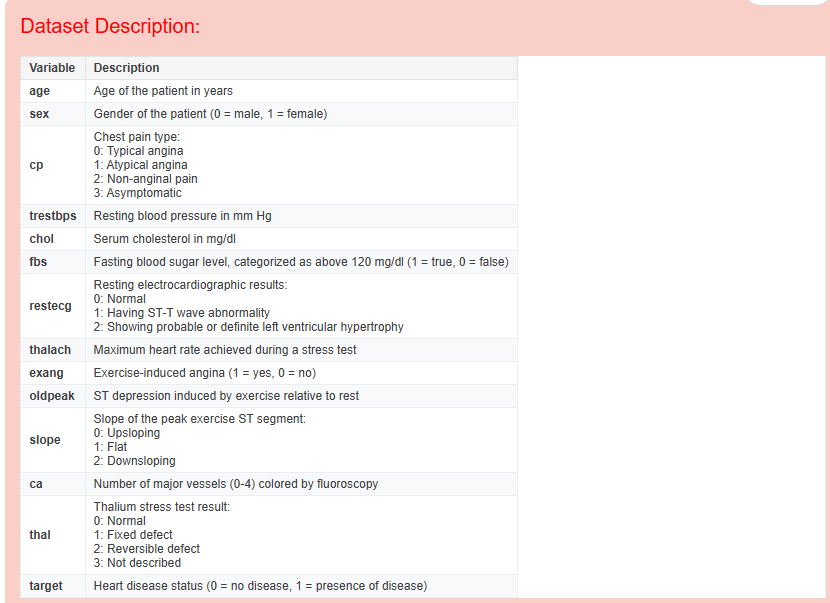

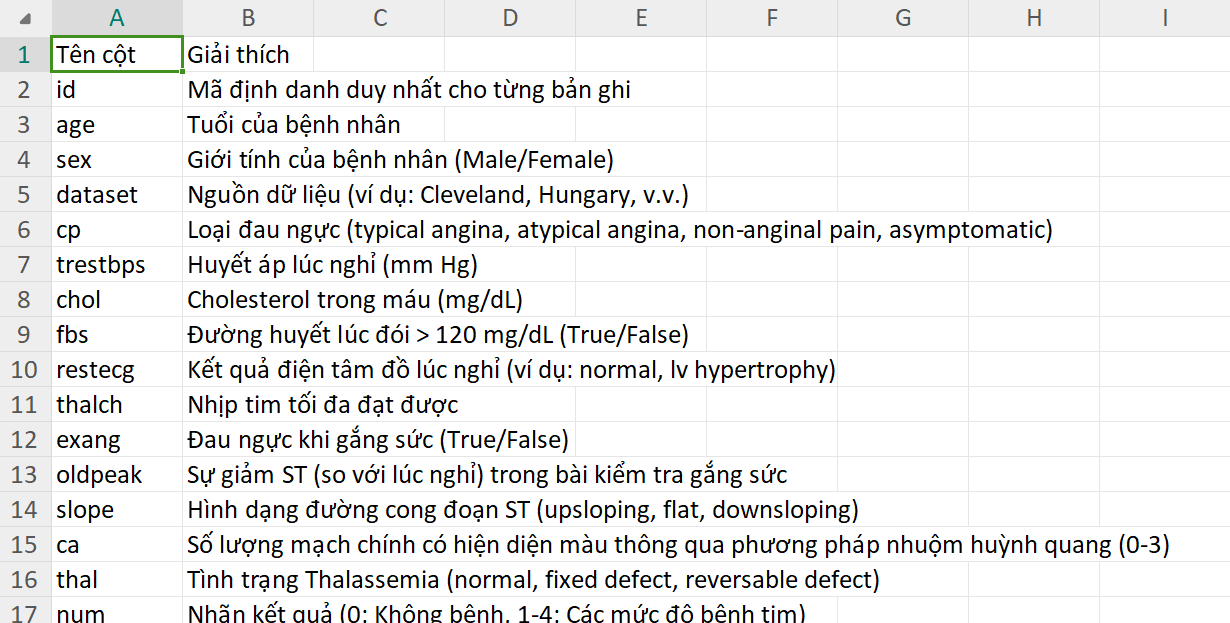

In [16]:
df_heart = pd.read_csv('heart_disease_uci.csv')
df_heart

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [22]:
df_heart.select_dtypes(include=('int64', 'float64'))

,id,age,trestbps,chol,thalch,oldpeak,ca,num
0,1,63,145.0,233.0,150.0,2.3,0.0,0
1,2,67,160.0,286.0,108.0,1.5,3.0,2
2,3,67,120.0,229.0,129.0,2.6,2.0,1
3,4,37,130.0,250.0,187.0,3.5,0.0,0
4,5,41,130.0,204.0,172.0,1.4,0.0,0
...,...,...,...,...,...,...,...,...
915,916,54,127.0,333.0,154.0,0.0,NaN,1
916,917,62,NaN,139.0,NaN,NaN,NaN,0
917,918,55,122.0,223.0,100.0,0.0,NaN,2
918,919,58,NaN,385.0,NaN,NaN,NaN,0


In [5]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


### Tách các đặc trưng số và mục lục(Categories)

In [23]:
numeric_col = ['age',	'trestbps',	'chol',	'thalch',	'oldpeak']
numeric_col


['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

In [25]:
categories_col = [column for column in df_heart.columns if column not in numeric_col]
categories_col

['id',
 'sex',
 'dataset',
 'cp',
 'fbs',
 'restecg',
 'exang',
 'slope',
 'ca',
 'thal',
 'num']

In [26]:
df_numeric = df_heart[numeric_col]
df_numeric

,age,trestbps,chol,thalch,oldpeak
0,63,145.0,233.0,150.0,2.3
1,67,160.0,286.0,108.0,1.5
2,67,120.0,229.0,129.0,2.6
3,37,130.0,250.0,187.0,3.5
4,41,130.0,204.0,172.0,1.4
...,...,...,...,...,...
915,54,127.0,333.0,154.0,0.0
916,62,NaN,139.0,NaN,NaN
917,55,122.0,223.0,100.0,0.0
918,58,NaN,385.0,NaN,NaN


In [27]:
df_categories = df_heart[categories_col].astype('object')
df_categories.dtypes

id         object
sex        object
dataset    object
cp         object
fbs        object
restecg    object
exang      object
slope      object
ca         object
thal       object
num        object
dtype: object

In [29]:
df_numeric.dtypes

age           int64
trestbps    float64
chol        float64
thalch      float64
oldpeak     float64
dtype: object

In [30]:
df_categories.dtypes


id         object
sex        object
dataset    object
cp         object
fbs        object
restecg    object
exang      object
slope      object
ca         object
thal       object
num        object
dtype: object